### The project analyzes the US election tweets to know the sentiments of people towards each candidate - Joe Biden & Donald Trump.

In [260]:
#Importing libraries that are going to be used further in our notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [261]:
# Reading the tweets and corpus data files through read_csv() function of Pandas and loading the data into Panda Dataframes. 
tweets = pd.read_csv('/Users/Mansi/Documents/INF1340H/Mid-Term Project/us_election_tweets.csv',low_memory=False)
corpusData = pd.read_csv('/Users/Mansi/Documents/INF1340H/Mid-Term Project/corpus.txt',delimiter="\t", header = None, names = ['Word','Value'])

In [262]:
#Reading stop words text file and storing all stop words in a list
stop_words = []
stop_words_file = open('/Users/Mansi/Documents/INF1340H/Mid-Term Project/stop_words.txt', 'r')
words = stop_words_file.read()
stop_words = words.split('\n')
stop_words_file.close()

### A. Implement functionality to parse and clean a data by applying each of these functions to all tweets:
 #### 1- Function lower_tweet(tw) that takes in as input tw, a tweet string. Then, returns the same string all in lower case.

In [263]:
def lower_tweet(tw):    
    return tw.lower()

 #### 2- Function clean_data(tw) that takes in as input tw, a tweet string, cleans it by removing all punctuations and returns the cleaned tweet as output.

In [264]:
import string
def clean_data(tw):
    remove = string.punctuation
    remove = remove.replace('#','')      # Removing '#' from the list of punctuations to be removed from the tweet
    table = tw.maketrans('', '', remove)
    result = tw.translate(table)
    result = result.replace('#',' ')     # Replacing '#' by single space
    result = result.replace("’","")      # removing apostrophes
    result = result.replace("\\","")     # Removing '\' from the tweet as it is not included in string.punctuation
    return result

#### 3- Function remove_stop_words(tw) that takes as input tw, a tweet string line, and returns the cleaned (stop words removed) version of the tweet as a string. stop_words.txt file is used to remove stop words from tweets. 

In [265]:
def remove_stop_words(tw):
    list_words = tw.split()
    no_stop_words = []
    for word in list_words:
        if word not in stop_words:
            no_stop_words.append(word)         
    tw_string = ' '.join(no_stop_words)
    return tw_string 

#### 4- Function bag_of_words(tw) that takes as input a tweet and creates a bag-of-words for it.

In [266]:
# function that takes a tweet and returns a dictionary of words with their counts in the tweet
def bag_of_words(tw):
    list_words = tw.split()
    dict_word_count = {}
    for word in list_words:
        if(word in dict_word_count):
            continue
        else:
            d = {word:list_words.count(word)}
            dict_word_count.update(d)
    return dict_word_count                      

### B. Implement functionality to calculate sentiment of each tweet related to each candidate. And return a value to show how positive and negative each tweet is.

#### 1- A function candidate_relation(tw), that takes as an input a tweet and decides that the tweet is about which candidate. When called on a string:
#### Trump has a campaign today at Florida, candidate_relation should return: T
#### Polls aren’t consistent with Biden’s winning, candidate_relation should return: B
#### The world has never seen a fight like this, candidate_relation should return: None
#### Who do you think will win? Donald or Joe, candidate_relation should return: TB or BT

In [267]:
def candidate_relation(tw):
    T = 0
    B = 0    
    if (('trump' in tw) or ('donald' in tw)):  #this will check if the tweet string or substring contains trump or donald in it
        T += 1
    if(('biden' in tw) or ('joe' in tw)):      #this will check if the tweet string or substring contains biden or joe in it
        B +=1
    if(T > 0):              #condition True if the tweet contains trump/donald
        if(B > 0):          #condition True if the tweet contains joe/biden
            return 'TB'     #returning 'TB' if both conditions are true
        else:
            return 'T'      #returning 'T' if tweet contains only trump/donald and no joe/biden
    elif(B > 0):
        return 'B'          #returning 'B' if tweet contains only joe/biden and no trump/donald
    else:
        return 'None'       #returning 'None' if the tweet contains none of the names of two candidates

#### 2- A function tweet_score(tw) to calculate a sentiment score for a tweet using the words it contains and their associated sentiment values. Data in corpus.csv file is used to get the sentiment values associated with the words. Notice that not all words in a tweet will have associated pre-calculated sentiment values. The score is a number between 0 (fully negative) and 1 (fully positive), e.g., score of 0.8 would indicate a tweet that is more positive than negative. A tweet that the algorithm cannot classify at all using the data in the corpus is given a score of -1. 

<font color=darkblue>Following steps are followed in the given order:
1. Cleaning of tweets
2. Calculating raw score of tweets and assigning sentiment 'Insufficient Data' to tweets whose score could not be calculated due to insifficient data in corpus.txt
3. Identifying and deleting rows containing tweets with outlier scores or tweets reduced to '' after cleanup
4. Normalizing final set of scores
5. Populating sentiments of all tweets(Positive, Negative, Neutral)

Note: For tweets where score could not be calculated due to insufficiency of data in corpus.txt, the score will be -1 and sentiment will be 'Insufficient Data'. This is to differentiate between calculated raw score equal to -1 and raw score equal to -1 where no data was matched with corpus word list.</font>

In [268]:
#Function that takes a cleaned tweet and calculates its score based on data available in corpus.txt(stored in corpusData dataframe)
#The function returns the two values : tweet raw score and sentiment 
#If any tweet words matches given corpus words, calculated score and '' as sentiment is returned
#If none of the tweet words matches given corpus words, -1 for score and 'Insufficient Data' for sentiment is returned
def tweet_score(tw): 
    flag = False
    score = 0
    list_words = tw.split()
    for word in list_words:
        if(word in corpusData['Word'].values):
            flag = True
            value = corpusData.loc[corpusData['Word'] == word,'Value'].iloc[0]
            score = score + value          
    if(flag == True):
        return score,''  
    else:
        return -1, 'Insufficient Data'

In [269]:
#Adding three additional columns to the tweet dataframe - score, sentiment and candidateRel
tweets["score"] = ""
tweets["sentiment"] = ""
tweets["candidateRel"] = ""
#cleaning tweets and deriving candidate relations
tweets['clean_tweet'] = tweets['tweet'].astype(str)     #Cloning string converted tweet column to another column 'clean_tweet' 
tweets['clean_tweet'] = tweets['clean_tweet'].apply(lower_tweet) #converting all cells of clean_tweet to lower case
tweets['clean_tweet'] = tweets['clean_tweet'].apply(clean_data) #removing punctuations from all cells of clean_tweet
tweets['clean_tweet'] = tweets['clean_tweet'].apply(remove_stop_words) #removing stop words from all cells of clean_tweet
tweets['candidateRel'] = tweets['clean_tweet'].apply(candidate_relation) #Applying candidate_relation function to all cells of clean_tweet

<font color=darkblue>Now all tweets in clean_tweet column are cleaned up and ready for score calculation.</font>

In [270]:
score = 0
sentiment = ''
for i in range(len(tweets)):
    score, sentiment = tweet_score(tweets.iloc[i]['clean_tweet']) #calling tweet_score(tw) function for all tweets
    tweets.at[i, 'score'] = score
    if(sentiment == 'Insufficient Data'):
        tweets.at[i, 'sentiment'] = "Insufficient Data"  #populating sentiment of all tweets where sufficient data was not available for score calculation

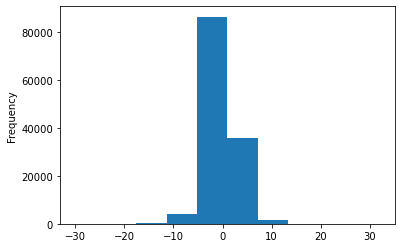

In [271]:
ax = tweets['score'].plot.hist(by='score') #plotting histogram of raw scores

<font color=darkblue>From above histogram it is seen that tweets with scores less and -20 and greater than 20 can be safely termed as outliers.</font>

In [272]:
tweets[(tweets['score'] < -20) | (tweets['score'] > 20)][['score']]

,score
20780,-22
27736,32
29766,-21
33608,-21
54834,21
61338,-22
67133,22
76137,-28
88470,-30
90437,-24


<font color=darkblue>In the below code snippet, rows having tweets with scores < -22 and > 22 will be dropped as they are the ones with greatest differences and less in number. Also any rows where the tweet is reduced to '' after cleanup will be dropped from the tweets dataframe.</font>

In [273]:
tweets_to_delete = tweets[(tweets['score'] < -22) | (tweets['score'] > 22) | (tweets['clean_tweet'] == '')].index.tolist()
print("Deleting",len(tweets_to_delete),"tweets")
tweets.drop(tweets_to_delete, inplace=True)  #dropping selected rows from the existing dataframe
tweets.reset_index(inplace=True,drop=True)   #re-indexing data frame after dropping rows

Deleting 13 tweets


<font color=darkblue>Below code snippet normalizes all scores for tweets with sentiment not equal to Insufficient Data.</font>

In [274]:
#Normalizing valid scores after removing outlier scores
#valid scores = scores which were caculated based on corpus.txt data
max_value = tweets["score"].max()
min_value = tweets["score"].min()
for i in range(len(tweets)):  
    if(tweets.iloc[i]["sentiment"] != 'Insufficient Data'):
        score = tweets.iloc[i]["score"]
        score = (score - min_value) / (max_value - min_value)
        tweets.at[i, 'score'] = score

In [276]:
#Function that populates tweet sentiment in the dataframe column 'sentiment' for all tweets whose score could be calculated based on data in corpus.txt file.
def setSentiment(df):
        for i in range(len(df)):
            score = df.iloc[i]["score"]
            if(df.iloc[i]["sentiment"] != 'Insufficient Data'):
                if(score > 0.5):
                    df.at[i, 'sentiment'] = "Positive"
                elif(score < 0.5):
                    df.at[i, 'sentiment'] = "Negative"
                elif(score == 0.5):
                    df.at[i, 'sentiment'] = "Neutral"  

In [277]:
#Calling setSentiment function and passing tweets dataframe to populate tweet sentiments based on scores
setSentiment(tweets)

### C. Analysis and insight extraction

In [279]:
#Creating a new dataframe copying only relevant columns of tweets dataframe for further processing.
tweets_sub = tweets[['clean_tweet','user_id','date','score','sentiment','candidateRel']]
tweets_sub.head()

,clean_tweet,user_id,date,score,sentiment,candidateRel
0,americans infuriate comments realise doesnt vo...,60666680.0,10/28/2020,0.454545,Negative,None
1,armstrongcbc surprise going volatile weeks mar...,186532092.0,10/28/2020,-1,Insufficient Data,None
2,cant wait till election fun trump supporters r...,915033138.0,10/28/2020,0.545455,Positive,T
3,america foreign country foreign correspondents...,49656209.0,10/28/2020,-1,Insufficient Data,None
4,wow guess actual journalism real coverage elec...,408109805.0,10/28/2020,0.522727,Positive,None


<font color=darkblue>In the below code snippet two seperate dataframes are created. One for tweets with candidate relation T and another for tweets with candidate relation B. Further tweets with cadidate relation TB are analyzed. If a tweet has only positive words for 1st cadidate and only negative words for 2nd cadidate, its row is added to 1st cadidate dataframe with score 1 and sentiment 'Positive' and added to 2nd candidate dataframe with score 0 and sentiment 'Negative'. For example, the record for following clean tweet having cadidate relation as TB will be added to df_Trump dataframe with score equal to 0 and Negative sentiment and to df_biden dataframe with score equal to 1 and Positive sentiment:</font> <font color=stealgrey> "noticed celebrities backing donald trump biggest lowlifes society trumpislosing trumpcollapse donaldout trumpforprison2020 bidenharris2020landslide uselection trumpcrimefamilyforprison httpstcol2mngkmie2"</font>

In [280]:
df_Trump = pd.DataFrame()
df_Biden = pd.DataFrame()
listTrumpPositive = ['votetrump','trumppence2020','trumpwillwin','trump2020','donaltrump2020']
listTrumpNegative = ['trumpout','trumpislosing','trumpunfit','trumpcollapse','donaldout']
listBidenPositive = ['votebiden','votejoebiden','bidenharris2020','joebiden2020','bidenwillwin'] 
listBidenNegative = ['bidenunfit','bidenislosing','bidenout','joebidenout','joebidenlosing']
for i in range(len(tweets_sub)):
    flagTP = False            #flag for positive words for Trump
    flagTN = False            #flag for negative words for Trump
    flagBP = False            #flag for positive words for Biden
    flagBN = False            #flag for negative words for Biden
    if(tweets_sub.iloc[i]['candidateRel'] == 'T'):
        df_Trump = df_Trump.append(tweets_sub.iloc[i])  
    elif(tweets_sub.iloc[i]['candidateRel'] == 'B'):
        df_Biden = df_Biden.append(tweets_sub.iloc[i])
    elif(tweets_sub.iloc[i]['candidateRel'] == 'TB'): # handling tweets with cadidate relation TB
        for eachWord in listTrumpPositive:
            if(eachWord in tweets_sub.iloc[i]['clean_tweet']):
                flagTP = True                   #flag updated to true if tweet contains positive words for Trump
                break
        for eachword in listTrumpNegative:
            if(eachword in tweets_sub.iloc[i]['clean_tweet']):
                flagTN = True                   #flag updated to true if tweet contains negative words for Trump
                break
        for eachWord in listBidenPositive:
            if(eachWord in tweets_sub.iloc[i]['clean_tweet']):
                flagBP = True                   #flag updated to true if tweet contains positive words for Biden
                break
        for eachword in listBidenNegative:
            if(eachword in tweets_sub.iloc[i]['clean_tweet']):
                flagBN = True                   #flag updated to true if tweet contains negative words for Biden
                break

        scoreNegative = 0
        scorePositive = 1
        if((flagTP == True) & (flagTN == False)):  #condition to check if tweet contains only positive words for Trump
            if((flagBP == False) & (flagBN == True)): #condition to check if tweet contains only negative words for Biden                       
                #creating temporary dataframe with score equal to 1 and sentiment equal to 'Positive' to append to df_Trump
                df_temp = pd.DataFrame({"clean_tweet":[tweets_sub.iloc[i]['clean_tweet']], 
                     "user_id":[tweets_sub.iloc[i]['user_id']], "date":[tweets_sub.iloc[i]['date']], "score":[scorePositive], "sentiment":['Positive'], "candidateRel":[tweets_sub.iloc[i]['candidateRel']]}) 
                df_Trump = df_Trump.append(df_temp, ignore_index=True)
                
                #creating temporary dataframe with score equal to 0 and sentiment equal to 'Negative' to append to df_Biden
                df_temp = pd.DataFrame({"clean_tweet":[tweets_sub.iloc[i]['clean_tweet']], 
                     "user_id":[tweets_sub.iloc[i]['user_id']], "date":[tweets_sub.iloc[i]['date']], "score":[scoreNegative], "sentiment":['Negative'], "candidateRel":[tweets_sub.iloc[i]['candidateRel']]}) 
                df_Biden = df_Biden.append(df_temp, ignore_index=True)

        elif((flagTP == False) & (flagTN == True)): #condition to check if tweet contains only negative words for trump
            if((flagBP == True) & (flagBN == False)): #condition to check if tweet contains only positive words for Biden
                #creating temporary dataframe with score equal to 0 and sentiment equal to 'Negative' to append to df_Trump
                df_temp = pd.DataFrame({"clean_tweet":[tweets_sub.iloc[i]['clean_tweet']], 
                     "user_id":[tweets_sub.iloc[i]['user_id']], "date":[tweets_sub.iloc[i]['date']], "score":[scoreNegative], "sentiment":['Negative'], "candidateRel":[tweets_sub.iloc[i]['candidateRel']]}) 
                df_Trump = df_Trump.append(df_temp, ignore_index=True)
                #creating temporary dataframe with score equal to 1 and sentiment equal to 'Positive' to append to df_Biden
                df_temp = pd.DataFrame({"clean_tweet":[tweets_sub.iloc[i]['clean_tweet']], 
                     "user_id":[tweets_sub.iloc[i]['user_id']], "date":[tweets_sub.iloc[i]['date']], "score":[scorePositive], "sentiment":['Positive'], "candidateRel":[tweets_sub.iloc[i]['candidateRel']]}) 
                df_Biden = df_Biden.append(df_temp, ignore_index=True)


In [281]:
print("There are", len(df_Trump), "records in df_Trump")
print("There are", len(df_Biden), "records in df_Biden")

There are 22913 records in df_Trump
There are 7317 records in df_Biden


#### 1- How positive or negative is the twitter environment toward each candidate?

<font color=brown>**Donald Trump:**</font>
There are close to 23K tweets for Donal Trump. Out of these, corpus.txt did not have enough data to calculate scores for 6708 tweets( 29.3% of total tweets of Trump). The remaining 16205 tweets( 70.7%) were categorized in 3 classes of sentiments - Positive, Negative and Neutral. 
**Figure 1** below shows that the number of negative tweets, related to Trump, are slightly more than the number of positive tweets. **Figure 2** shows that 33.8% of tweets related to Trump are negative, while 33.1% of them are positive and 29.3% of them are Neutral in sentiments. There is not a huge difference in the count of negative and positive tweets for Donald Trump. But, **figure 4** shows that out of total 10518 unique users that tweeted about Donal Trump, 4248 users tweeted positive tweets, 4055 users tweeted negative tweets, and 634 users tweeted neutral tweets. The remaining users account for the tweets with sentiment 'Insufficient Data'. It is also calculated further that there are 703 users who tweeted both postive and negative tweets. It can thus be inferred that the number of Trump supporters are slightly more than the number of non-supporters. The supporters just tweeted slightly lesser number of times than non-supporters did. <font>**To summarize, Donald Trump had slightly more number of negative tweets than positive tweets but he had a little more number of supporters in terms of unique users of positive tweets as compared to the count of non-supporters.**</font>

<font color=brown>**Joe Biden:**</font>
There are 7317 tweets that mention Joe Biden. Out of these, corpus.txt did not have enough data to calculate scores for 2031 tweets, i.e. 27.8% of total tweets of Biden. The remaining 5286 tweets(72.2%) were categorized into 3 classes of sentiments - Positive, Negative and Neutral. 
**Figure 1** below shows that Biden has more number of positive tweets than the number of negative tweets. **Figure 3** shows that out of the total Biden tweets only 29.3% have negative sentiments, while 40.5% of them have positive sentiments and a small percentage of tweets, 2.5%, are Neutral in sentiments. The number of positive tweets is way higher than the number of negative tweets. Also, **figure 4** shows that out of total 4049 unique users that tweeted about Joe Biden, 1867 users tweeted positive tweets, 1372 users tweeted negative tweets, and 160 users tweeted neutral tweets. The remaining users account for the tweets with sentiment 'Insufficient Data'. It can thus be inferred that he had more supporters than the count of non-supporters. <font>**To summarize, for Joe Biden though there are less number of tweets mentioning him as compared to Donald Trump, the twitter environment is fairly positive for him, both in terms of percentage of positive tweets and percentage of unique supporters who tweeted positive tweets.**
</font>

<font>Note:
1. The dataset is not well distributed. We have more data related to Donald Trump than to Joe Biden. 
2. There is a significant count of tweets whose score could not be calculated based on the data in corpus.txt. They have been left from the analysis.</font>

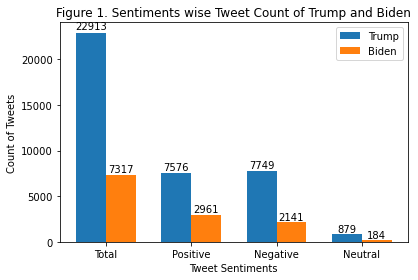

In [282]:
figure1()

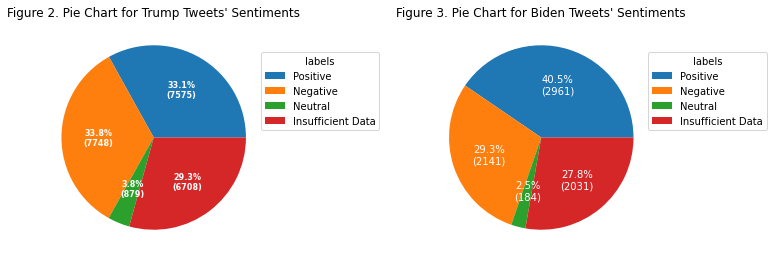

In [283]:
figure23()

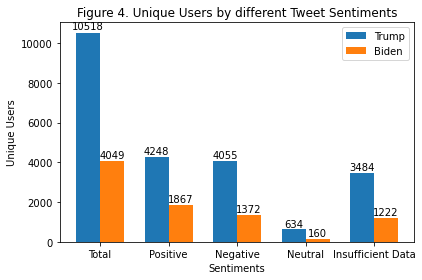

In [284]:
figure4()

In [285]:
#Extracting count of tweets under each sentiment for both candidates
T1 = len(df_Trump)
B1 = len(df_Biden)

T2 = len(df_Trump[df_Trump['sentiment'] == 'Positive'])
B2 = len(df_Biden[df_Biden['sentiment'] == 'Positive'])

T3 = len(df_Trump[df_Trump['sentiment'] == 'Negative'])
B3 = len(df_Biden[df_Biden['sentiment'] == 'Negative'])

T4 = len(df_Trump[df_Trump['sentiment'] == 'Neutral'])
B4 = len(df_Biden[df_Biden['sentiment'] == 'Neutral'])

T5 = len(df_Trump[df_Trump['sentiment'] == 'Insufficient Data'])
B5 = len(df_Biden[df_Biden['sentiment'] == 'Insufficient Data'])

In [286]:
#Function to display percentage of tweets for each pie slice
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

#Function to display count of tweets/users above each bar.
def countlabel(rects, xpos='center'):
    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,'{}'.format(height), ha=ha[xpos], va='bottom')

#Code block to plot bar graph of count of tweets for each sentiment for Trump and Biden
def figure1():  
    # Count of Total,Positive,Negative,Neutral tweets
    Trump = (T1, T2, T3, T4)
    Biden = (B1, B2, B3, B4)
    labels = ['Total', 'Positive', 'Negative', 'Neutral']

    x = np.arange(len(labels))  #the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, Trump, width, label='Trump')
    rects2 = ax.bar(x + width/2, Biden, width, label='Biden')
    ax.set_xlabel('Tweet Sentiments')
    ax.set_ylabel('Count of Tweets')
    ax.set_title('Figure 1. Sentiments wise Tweet Count of Trump and Biden')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    def countlabel(rects, xpos='center'):
        xpos = xpos.lower()
        ha = {'center': 'center', 'right': 'left', 'left': 'right'}
        offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,'{}'.format(height), ha=ha[xpos], va='bottom')

    countlabel(rects1)
    countlabel(rects2)

    fig.tight_layout()
    plt.show()

In [287]:
#Code block to plot pie charts displaying tweets share under each sentiment for both the candidates
def figure23():
    fig, ax = plt.subplots(1,2,figsize=(11, 5), subplot_kw=dict(aspect="equal"))

    labels = ['Positive', 'Negative', 'Neutral','Insufficient Data']
    trump = [T2, T3, T4, T5]
    biden = [B2, B3, B4, B5]

    wedges, texts, autotexts = ax[0].pie(trump, labels=labels, autopct=lambda pct: func(pct, trump),textprops=dict(color="w"))
    ax[1].pie(biden, labels=labels, autopct=lambda pct: func(pct, biden),textprops=dict(color="w"))

    ax[0].legend(wedges, labels,
              title="labels",
              loc="center right",
              bbox_to_anchor=(0.8, 0.2, 0.7, 1))
    ax[1].legend(wedges, labels,
              title="labels",
              loc="right",
              bbox_to_anchor=(0.8, 0.2, 0.7, 1))
    plt.setp(autotexts, size=8, weight="bold")
    ax[0].set_title("Figure 2. Pie Chart for Trump Tweets' Sentiments")
    ax[1].set_title("Figure 3. Pie Chart for Biden Tweets' Sentiments")
    fig.tight_layout()
    plt.show()


In [288]:
#Code block to plot grouped bar chart of count of unique users for both candidates(Total and each sentiment wise)
def figure4():
    labels = ['Total', 'Positive', 'Negative', 'Neutral','Insufficient Data']
    trumpUsers = [TotalT, PositiveT, NegativeT, NeutralT, InsufficientT]
    bidenUsers = [TotalB, PositiveB, NegativeB, NeutralB, InsufficientB]
    fig, ax = plt.subplots()
    x = np.arange(len(labels))
    width = 0.35 
    rects1 = ax.bar(x - width/2, trumpUsers, width, label='Trump')
    rects2 = ax.bar(x + width/2, bidenUsers, width, label='Biden')
    
    ax.set_ylabel('Unique Users')
    ax.set_xlabel('Sentiments')
    ax.set_title('Figure 4. Unique Users by different Tweet Sentiments')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    def countlabel(rects, xpos='center'):
        xpos = xpos.lower()  # normalize the case of the parameter
        ha = {'center': 'center', 'right': 'left', 'left': 'right'}
        offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,'{}'.format(height), ha=ha[xpos], va='bottom')

    countlabel(rects1)
    countlabel(rects2)

    fig.tight_layout()

    plt.show()

#### 2- How many supporters can be estimated for each one among these twitter users?

<font color=brown>**Donald Trump:**</font>
Figure 5 below shows that there are 4248 unique users who tweeted positively for Donald Trump. These users correspond to the tweets whose score could be calculated using corpus.txt data. It is thus estimated that the number of supporters for Donald Trump is more than 4248.

<font color=brown>**Joe Biden:**</font>
Figure 5 below shows that there are 1867 unique users who tweeted positively for Joe Biden. These users correspond to the tweets whose score could be calculated using corpus.txt data. It is thus estimated that the number of supporters for Joe Biden is more than 1867.

Note: The low count of supporters of Joe Biden is due to the fact that there are overall lesser number of tweets mentioning him. It cannot be assumed that there are actually less number of supporters for Joe Biden than for Donal Trump.  

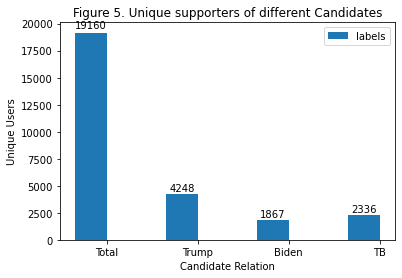

In [289]:
figure5()

In [290]:
#Extracting count of unique users for both candidates(Total and each sentiment wise)
TotalT = df_Trump['user_id'].nunique()
PositiveT = df_Trump.loc[df_Trump['sentiment'] == 'Positive',:]['user_id'].nunique()
NegativeT = df_Trump.loc[df_Trump['sentiment'] == 'Negative',:]['user_id'].nunique()
NeutralT = df_Trump.loc[df_Trump['sentiment'] == 'Neutral',:]['user_id'].nunique()
InsufficientT = df_Trump.loc[df_Trump['sentiment'] == 'Insufficient Data',:]['user_id'].nunique()
TotalB = df_Biden['user_id'].nunique()
PositiveB = df_Biden.loc[df_Biden['sentiment'] == 'Positive',:]['user_id'].nunique()
NegativeB = df_Biden.loc[df_Biden['sentiment'] == 'Negative',:]['user_id'].nunique()
NeutralB = df_Biden.loc[df_Biden['sentiment'] == 'Neutral',:]['user_id'].nunique()
InsufficientB = df_Biden.loc[df_Biden['sentiment'] == 'Insufficient Data',:]['user_id'].nunique()
seriesP = df_Trump.loc[df_Trump['sentiment'] == 'Positive',:]['user_id'].unique()
seriesN = df_Trump.loc[df_Trump['sentiment'] == 'Negative',:]['user_id'].unique()
print(len(np.intersect1d(seriesP, seriesN))) #unque users who tweeted positive as well as negative tweets for Trump

703


In [291]:
#function to plot bar chart of count of supporters(Total and cadidate relation wise)
def figure5():
    Total = tweets_sub.loc[tweets_sub['sentiment'] == 'Positive',:]['user_id'].nunique()
    PositiveTB = tweets_sub[(tweets_sub['candidateRel'] == 'TB') & (tweets_sub['sentiment'] == 'Positive')]['user_id'].nunique()
    labels = ['Total', 'Trump', 'Biden', 'TB']
    Data = [Total, PositiveT, PositiveB, PositiveTB]

    fig, ax = plt.subplots()
    x = np.arange(len(labels))
    width = 0.35
    rects = ax.bar(x - width/2, Data, width, label='labels')
    def countlabel(rects, xpos='center'):
        xpos = xpos.lower()  # normalize the case of the parameter
        ha = {'center': 'center', 'right': 'left', 'left': 'right'}
        offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,'{}'.format(height), ha=ha[xpos], va='bottom')
    countlabel(rects)
    ax.set_ylabel('Unique Users')
    ax.set_xlabel('Candidate Relation')
    ax.set_title('Figure 5. Unique supporters of different Candidates')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.show()

#### 3- Analyze popularity of each candidate throughout the two months period.

<font color=brown>**Donald Trump:**</font>
The tweets distribution graphs below shows that there is only a slight increase in Donald Trump's popularity from the start to end of two month period, except in the week of September 21, where there is a sharp increase in positive tweets. On the other hand there is a significant increase in the count of total tweets and tweets with negative and neutral sentiments in this period. As the weeks progressed, the Twitter environment grew more negative towards Donald trump than it grew more postive. The users distribution graph below also re-affirms the same thing by showing similar rates. Thus Donald Trump became more unpopular in this period than he grew popular.

<font color=brown>**Joe Biden:**</font>
Joe Biden's popularity grew in line with the growth in his total tweets and his total users in this period. As the weeks progressed and his total tweets increased, a similar increase can be seen in his positive tweets and his positive user base. But, there is also a similar increase in his negative tweets and his negative user base. Thus it can be said his popularity and unpopularity, both grew at a similar rate over time in this period.

Again, as the number of Trump tweets are more than Bidens tweets, the count of tweets in all categories(Positive, Negative, Neutral) are more for Trump if compared to Biden's tweets. But, individually Biden popularity grew on a similar rate as his total tweet count increased. Whereas Trump's popularity grew at a much smaller rate compared to rate of increase in his total tweets.

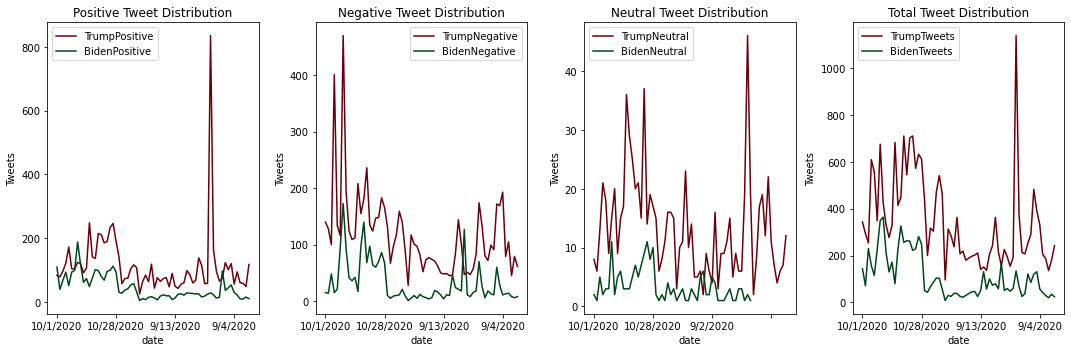

In [292]:
figure6()

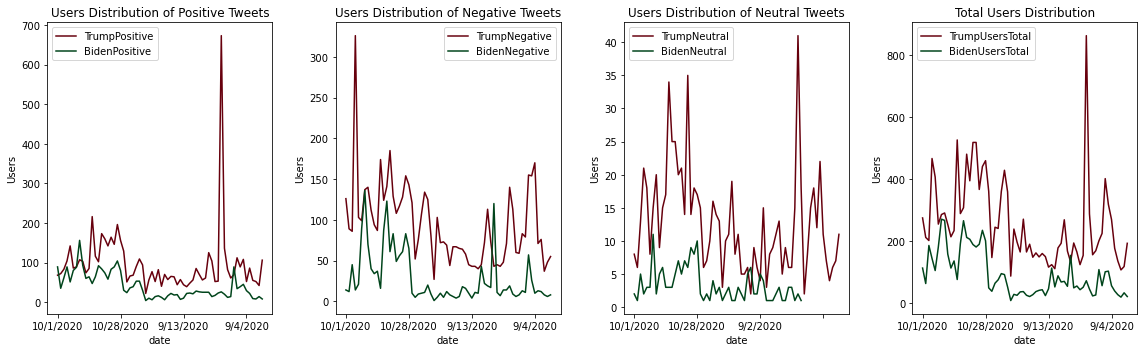

In [293]:
figure7()

In [294]:
#Converting date column of data frames to datetime format
df_Trump['date'] = pd.to_datetime(df_Trump['date'],infer_datetime_format=True,dayfirst=True, errors='coerce')
df_Biden['date'] = pd.to_datetime(df_Biden['date'],infer_datetime_format=True,dayfirst=True, errors='coerce')

In [295]:
#Function to plot distrbution of tweets by date and different sentiments for both candidates
def figure6():
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
    df_Trump.loc[df_Trump['sentiment'] == 'Neutral',:].groupby('date')['clean_tweet'].size().plot(ax = axes[2],subplots=True,legend=True, colormap='Reds_r', label = 'TrumpNeutral')
    df_Biden.loc[df_Biden['sentiment'] == 'Neutral',:].groupby('date')['clean_tweet'].size().plot(ax = axes[2],subplots=True,legend=True, colormap='Greens_r', label = 'BidenNeutral')

    df_Trump.groupby('date')['clean_tweet'].size().plot(ax = axes[3],subplots=True,legend=True, colormap='Reds_r', label = 'TrumpTweets')
    df_Biden.groupby('date')['clean_tweet'].size().plot(ax = axes[3],subplots=True,legend=True, colormap='Greens_r', label = 'BidenTweets')

    df_Trump.loc[df_Trump['sentiment'] == 'Positive',:].groupby('date')['clean_tweet'].size().plot(ax = axes[0],subplots=True,legend=True, colormap='Reds_r', label = 'TrumpPositive')
    df_Biden.loc[df_Biden['sentiment'] == 'Positive',:].groupby('date')['clean_tweet'].size().plot(ax = axes[0],subplots=True,legend=True, colormap='Greens_r', label = 'BidenPositive')

    df_Trump.loc[df_Trump['sentiment'] == 'Negative',:].groupby('date')['clean_tweet'].size().plot(ax = axes[1],subplots=True,legend=True, colormap='Reds_r', label = 'TrumpNegative')
    df_Biden.loc[df_Biden['sentiment'] == 'Negative',:].groupby('date')['clean_tweet'].size().plot(ax = axes[1],subplots=True,legend=True, colormap='Greens_r', label = 'BidenNegative')

    axes[0].set_title("Positive Tweet Distribution")
    axes[0].set_ylabel('Tweets')
    axes[1].set_title("Negative Tweet Distribution")
    axes[1].set_ylabel('Tweets')
    axes[2].set_title("Neutral Tweet Distribution")
    axes[2].set_ylabel('Tweets')
    axes[3].set_title("Total Tweet Distribution")
    axes[3].set_ylabel('Tweets')
    
    fig.tight_layout()
    plt.show()

In [296]:
#Function to plot distrbution of unique users by date and different sentiments for both candidates
def figure7():
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 5))

    df_Trump.loc[df_Trump['sentiment'] == 'Positive',:].groupby('date')['user_id'].nunique().plot(ax = axes[0],subplots=True,legend=True, colormap='Reds_r', label = 'TrumpPositive')
    df_Biden.loc[df_Biden['sentiment'] == 'Positive',:].groupby('date')['user_id'].nunique().plot(ax = axes[0],subplots=True,legend=True, colormap='Greens_r', label = 'BidenPositive')

    df_Trump.loc[df_Trump['sentiment'] == 'Negative',:].groupby('date')['user_id'].nunique().plot(ax = axes[1],subplots=True,legend=True, colormap='Reds_r', label = 'TrumpNegative')
    df_Biden.loc[df_Biden['sentiment'] == 'Negative',:].groupby('date')['user_id'].nunique().plot(ax = axes[1],subplots=True,legend=True, colormap='Greens_r', label = 'BidenNegative')

    df_Trump.loc[df_Trump['sentiment'] == 'Neutral',:].groupby('date')['user_id'].nunique().plot(ax = axes[2],subplots=True,legend=True, colormap='Reds_r', label = 'TrumpNeutral')
    df_Biden.loc[df_Biden['sentiment'] == 'Neutral',:].groupby('date')['user_id'].nunique().plot(ax = axes[2],subplots=True,legend=True, colormap='Greens_r', label = 'BidenNeutral')

    df_Trump.groupby('date')['user_id'].nunique().plot(ax = axes[3],subplots=True,legend=True, colormap='Reds_r', label = 'TrumpUsersTotal')
    df_Biden.groupby('date')['user_id'].nunique().plot(ax = axes[3],subplots=True,legend=True, colormap='Greens_r', label = 'BidenUsersTotal')
    axes[0].set_title("Users Distribution of Positive Tweets")
    axes[0].set_ylabel('Users')
    axes[1].set_title("Users Distribution of Negative Tweets")
    axes[1].set_ylabel('Users')
    axes[2].set_title("Users Distribution of Neutral Tweets")
    axes[2].set_ylabel('Users')
    axes[3].set_title("Total Users Distribution")
    axes[3].set_ylabel('Users')
    
    fig.tight_layout()
    plt.show()

#### D. Visualize a proper word cloud for tweets related to each candidate. 

In [302]:
import sys
!/Users/Mansi/opt/anaconda3/bin/python/ -m pip install wordcloud

In [303]:
#Calling bag_of_words(tw) function to extract a single bag of words of all tweets of Donald Trump
dict_word_bag_Trump = {}   #Dictionary that would contain all words of all tweets of Donald Trump with their counts
for i in range(len(df_Trump)):
    tw = df_Trump.iloc[i]["clean_tweet"]
    d = bag_of_words(tw)
    for key in d.keys():
        if key in dict_word_bag_Trump.keys():
            dict_word_bag_Trump[key] = dict_word_bag_Trump[key] + d[key]
        else:
            dict_word_bag_Trump.update({key:d[key]})

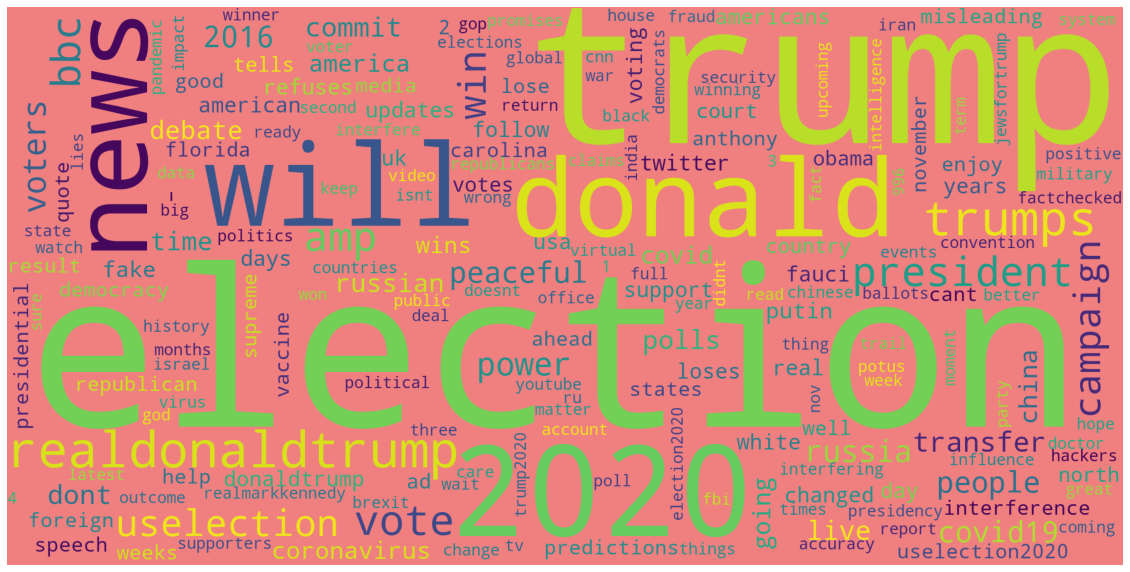

In [304]:
#Code block to generate word cloud for Donald Trump
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='LightCoral', collocations=False).generate_from_frequencies(dict_word_bag_Trump)
plt.figure(figsize=(20, 15))
# Display image
plt.imshow(wordcloud) 
plt.axis("off");

In [305]:
#Calling bag_of_words(tw) function to extract a single bag of words of all tweets of Joe Biden
dict_word_bag_Biden = {}  #Dictionary that would contain all words of all tweets of Joe Biden with their counts
for i in range(len(df_Biden)):
    tw = df_Biden.iloc[i]["clean_tweet"]
    d = bag_of_words(tw)
    for key in d.keys():
        if key in dict_word_bag_Biden.keys():
            dict_word_bag_Biden[key] = dict_word_bag_Biden[key] + d[key]
        else:
            dict_word_bag_Biden.update({key:d[key]})

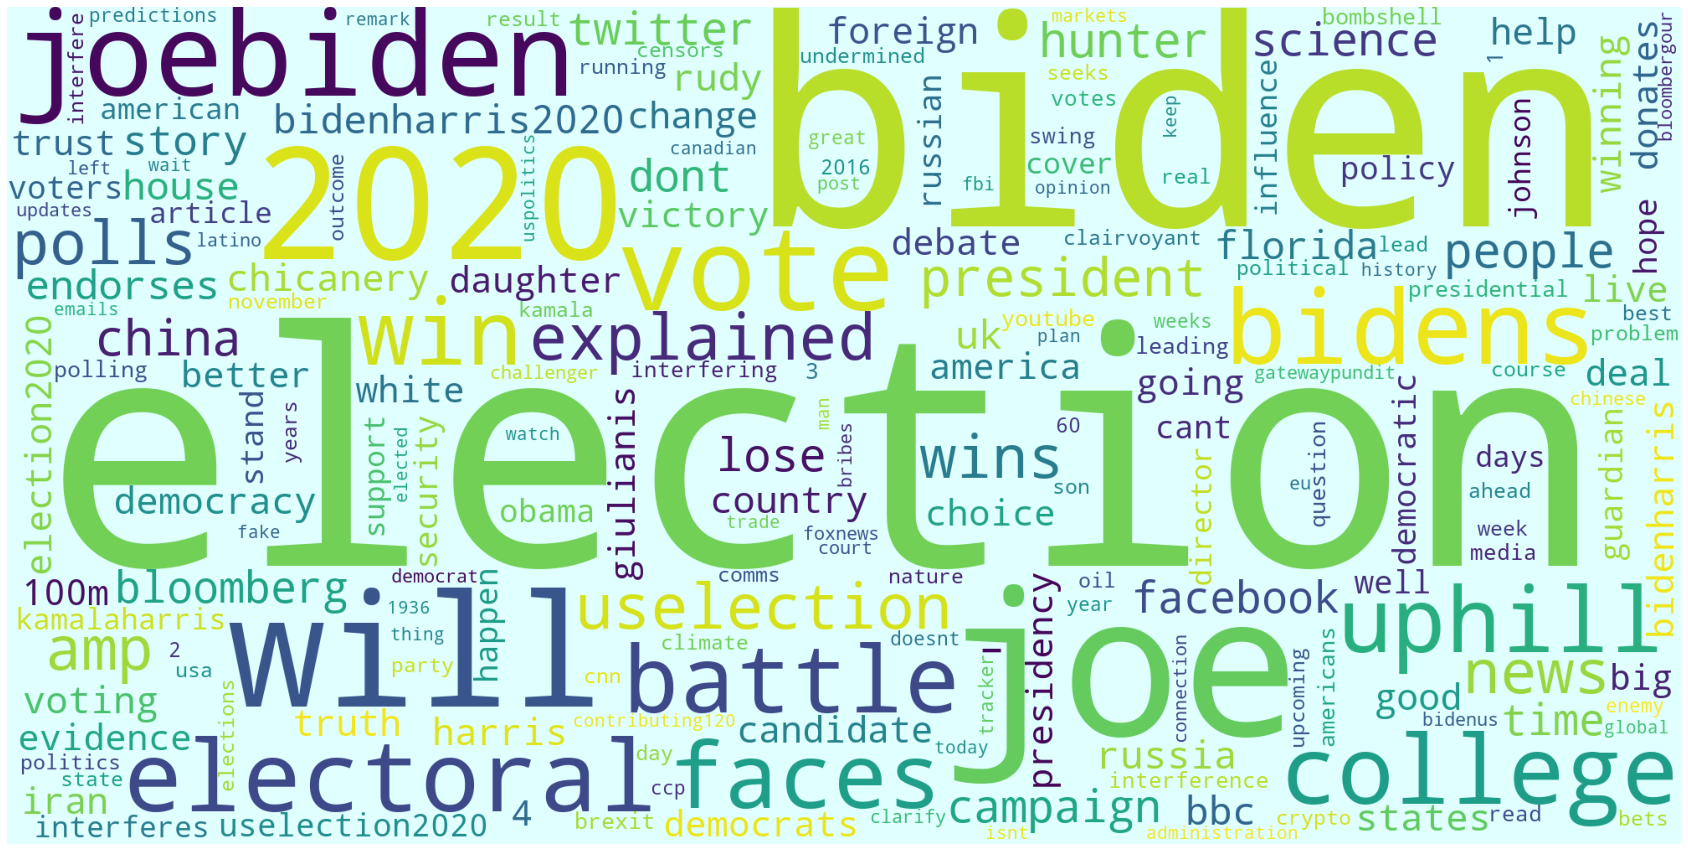

In [306]:
#Code block to generate word cloud for Joe Biden
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='Lightcyan', collocations=False).generate_from_frequencies(dict_word_bag_Biden)
plt.figure(figsize=(30, 20))
plt.imshow(wordcloud) 
plt.axis("off");